### 자전거 수요 예측

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
bike_train = pd.read_csv(r'C:\Users\digus\Desktop\MachineLearning\bike_train.csv')

In [3]:
bike_train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 1:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 2:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 3:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 4:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 5:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 6:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 7:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 8:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 9:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [4]:
bike_train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [5]:
bike_train.index.values

array([    0,     1,     2, ..., 10883, 10884, 10885], dtype=int64)

### 데이터 전처리

In [6]:
bike_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [8]:
bike_train["Date"] = bike_train.datetime.apply(lambda x : x.split()[0])
bike_train["Date"]   #날짜 split

0        2011-01-01
1        2011-01-01
2        2011-01-01
3        2011-01-01
4        2011-01-01
5        2011-01-01
6        2011-01-01
7        2011-01-01
8        2011-01-01
9        2011-01-01
10       2011-01-01
11       2011-01-01
12       2011-01-01
13       2011-01-01
14       2011-01-01
15       2011-01-01
16       2011-01-01
17       2011-01-01
18       2011-01-01
19       2011-01-01
20       2011-01-01
21       2011-01-01
22       2011-01-01
23       2011-01-01
24       2011-01-02
25       2011-01-02
26       2011-01-02
27       2011-01-02
28       2011-01-02
29       2011-01-02
            ...    
10856    2012-12-18
10857    2012-12-18
10858    2012-12-18
10859    2012-12-18
10860    2012-12-18
10861    2012-12-18
10862    2012-12-19
10863    2012-12-19
10864    2012-12-19
10865    2012-12-19
10866    2012-12-19
10867    2012-12-19
10868    2012-12-19
10869    2012-12-19
10870    2012-12-19
10871    2012-12-19
10872    2012-12-19
10873    2012-12-19
10874    2012-12-19


In [9]:
bike_train["Time"] = bike_train.datetime.apply(lambda x : x[11:13].split(':')[0])
bike_train["Time"] = pd.to_numeric(bike_train.Time)
bike_train["Time"]  #시간 split

0         0
1         1
2         2
3         3
4         4
5         5
6         6
7         7
8         8
9         9
10       10
11       11
12       12
13       13
14       14
15       15
16       16
17       17
18       18
19       19
20       20
21       21
22       22
23       23
24        0
25        1
26        2
27        3
28        4
29        6
         ..
10856    18
10857    19
10858    20
10859    21
10860    22
10861    23
10862     0
10863     1
10864     2
10865     3
10866     4
10867     5
10868     6
10869     7
10870     8
10871     9
10872    10
10873    11
10874    12
10875    13
10876    14
10877    15
10878    16
10879    17
10880    18
10881    19
10882    20
10883    21
10884    22
10885    23
Name: Time, Length: 10886, dtype: int64

In [10]:
bike_train["Year"] = bike_train.Date.apply(lambda x : x.split('-')[0])
bike_train["Year"] = pd.to_numeric(bike_train.Year)
bike_train["Year"]  # date 중 연도 split

0        2011
1        2011
2        2011
3        2011
4        2011
5        2011
6        2011
7        2011
8        2011
9        2011
10       2011
11       2011
12       2011
13       2011
14       2011
15       2011
16       2011
17       2011
18       2011
19       2011
20       2011
21       2011
22       2011
23       2011
24       2011
25       2011
26       2011
27       2011
28       2011
29       2011
         ... 
10856    2012
10857    2012
10858    2012
10859    2012
10860    2012
10861    2012
10862    2012
10863    2012
10864    2012
10865    2012
10866    2012
10867    2012
10868    2012
10869    2012
10870    2012
10871    2012
10872    2012
10873    2012
10874    2012
10875    2012
10876    2012
10877    2012
10878    2012
10879    2012
10880    2012
10881    2012
10882    2012
10883    2012
10884    2012
10885    2012
Name: Year, Length: 10886, dtype: int64

In [11]:
bike_train["Month"] = bike_train.Date.apply(lambda x : x.split('-')[1])
bike_train["Month"] = pd.to_numeric(bike_train.Month)
bike_train["Month"]  #date 중 월 split

0         1
1         1
2         1
3         1
4         1
5         1
6         1
7         1
8         1
9         1
10        1
11        1
12        1
13        1
14        1
15        1
16        1
17        1
18        1
19        1
20        1
21        1
22        1
23        1
24        1
25        1
26        1
27        1
28        1
29        1
         ..
10856    12
10857    12
10858    12
10859    12
10860    12
10861    12
10862    12
10863    12
10864    12
10865    12
10866    12
10867    12
10868    12
10869    12
10870    12
10871    12
10872    12
10873    12
10874    12
10875    12
10876    12
10877    12
10878    12
10879    12
10880    12
10881    12
10882    12
10883    12
10884    12
10885    12
Name: Month, Length: 10886, dtype: int64

In [12]:
bike_train["Day"] = bike_train.Date.apply(lambda x : x.split('-')[2])
bike_train["Day"] = pd.to_numeric(bike_train.Day)
bike_train["Day"]   # date 중 일 split

0         1
1         1
2         1
3         1
4         1
5         1
6         1
7         1
8         1
9         1
10        1
11        1
12        1
13        1
14        1
15        1
16        1
17        1
18        1
19        1
20        1
21        1
22        1
23        1
24        2
25        2
26        2
27        2
28        2
29        2
         ..
10856    18
10857    18
10858    18
10859    18
10860    18
10861    18
10862    19
10863    19
10864    19
10865    19
10866    19
10867    19
10868    19
10869    19
10870    19
10871    19
10872    19
10873    19
10874    19
10875    19
10876    19
10877    19
10878    19
10879    19
10880    19
10881    19
10882    19
10883    19
10884    19
10885    19
Name: Day, Length: 10886, dtype: int64

In [13]:
pd.concat([bike_train["Date"],bike_train["Time"], bike_train["Year"], bike_train["Month"], bike_train["Day"] ], axis=1)
# 위에서 split한 데이터를 붙입니다.

,Date,Time,Year,Month,Day
0,2011-01-01,0,2011,1,1
1,2011-01-01,1,2011,1,1
2,2011-01-01,2,2011,1,1
3,2011-01-01,3,2011,1,1
4,2011-01-01,4,2011,1,1
5,2011-01-01,5,2011,1,1
6,2011-01-01,6,2011,1,1
7,2011-01-01,7,2011,1,1
8,2011-01-01,8,2011,1,1
9,2011-01-01,9,2011,1,1


In [14]:
bike_train = bike_train.drop('Date', axis=1)

In [15]:
bike_train        #뒤에 행이 추가됨

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Time,Year,Month,Day
0,2011-01-01 0:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0,2011,1,1
1,2011-01-01 1:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,2011,1,1
2,2011-01-01 2:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2,2011,1,1
3,2011-01-01 3:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,3,2011,1,1
4,2011-01-01 4:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4,2011,1,1
5,2011-01-01 5:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,5,2011,1,1
6,2011-01-01 6:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,6,2011,1,1
7,2011-01-01 7:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,7,2011,1,1
8,2011-01-01 8:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,8,2011,1,1
9,2011-01-01 9:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14,9,2011,1,1


In [16]:
bike_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
Time          10886 non-null int64
Year          10886 non-null int64
Month         10886 non-null int64
Day           10886 non-null int64
dtypes: float64(3), int64(12), object(1)
memory usage: 1.3+ MB


### 시간대와 자전거 수요의 상관관계
#### 하루 중 어느 시간대에 자전거를 많이 탈까

C:\Users\digus\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\digus\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\digus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


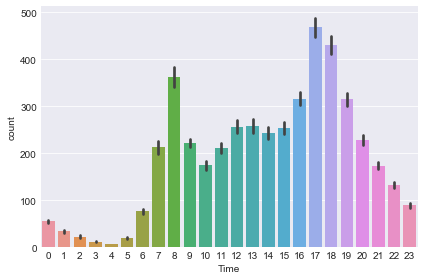

In [142]:
sns.factorplot(x='Time', y='count', data=bike_train, kind='bar',size=4,aspect=1.5)

In [18]:
bike_train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Time,Year,Month,Day
0,2011-01-01 0:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0,2011,1,1
1,2011-01-01 1:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,2011,1,1
2,2011-01-01 2:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2,2011,1,1
3,2011-01-01 3:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,3,2011,1,1
4,2011-01-01 4:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4,2011,1,1
5,2011-01-01 5:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,5,2011,1,1
6,2011-01-01 6:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,6,2011,1,1
7,2011-01-01 7:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,7,2011,1,1
8,2011-01-01 8:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,8,2011,1,1
9,2011-01-01 9:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14,9,2011,1,1


#### 월별, 날짜별 자전거 수요는 어떻게 될까

In [19]:
bike1 = bike_train[bike_train['Month']==1].groupby('Day')['count'].mean()
bike2 = bike_train[bike_train['Month']==2].groupby('Day')['count'].mean()
bike3 = bike_train[bike_train['Month']==3].groupby('Day')['count'].mean()
bike4 = bike_train[bike_train['Month']==4].groupby('Day')['count'].mean()
bike5 = bike_train[bike_train['Month']==5].groupby('Day')['count'].mean()
bike6 = bike_train[bike_train['Month']==6].groupby('Day')['count'].mean()
bike7 = bike_train[bike_train['Month']==7].groupby('Day')['count'].mean()
bike8 = bike_train[bike_train['Month']==8].groupby('Day')['count'].mean()
bike9 = bike_train[bike_train['Month']==9].groupby('Day')['count'].mean()
bike10 = bike_train[bike_train['Month']==10].groupby('Day')['count'].mean()
bike11 = bike_train[bike_train['Month']==11].groupby('Day')['count'].mean()
bike12 = bike_train[bike_train['Month']==12].groupby('Day')['count'].mean()
bike13 = bike_train.groupby('Day')['count'].mean()

In [20]:
bike_train_Month = pd.DataFrame({'Jan':bike1,'Fab':bike2,'Mar':bike3,'Apr':bike4,
                                 'May':bike5,'Jun':bike6,'Jul':bike7,'Aug':bike8,'Sep':bike9,'Oct':bike10,'Nov':bike11,'Dec':bike12})

In [21]:
bike_train_Month

,Jan,Fab,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Day,,,,,,,,,,,,
1,68.312500,126.361702,142.520833,172.250000,189.395833,168.770833,226.937500,246.791667,234.479167,191.812500,209.458333,185.791667
2,59.826087,110.145833,111.000000,174.212766,220.208333,272.666667,236.375000,252.208333,219.520833,157.437500,209.020833,178.937500
3,77.934783,121.297872,119.812500,208.770833,226.500000,269.854167,235.604167,223.937500,219.125000,232.125000,189.833333,205.166667
4,83.617021,96.595745,111.812500,198.979167,186.020833,257.083333,280.125000,237.500000,245.916667,245.500000,190.687500,210.229167
5,103.659574,82.333333,112.708333,171.916667,235.750000,248.062500,227.208333,215.208333,217.979167,270.458333,191.354167,198.750000
6,121.361702,115.042553,97.042553,193.083333,228.479167,241.729167,225.750000,235.562500,189.638298,265.208333,194.479167,166.020833
7,128.319149,126.812500,144.425532,208.291667,228.895833,256.812500,196.500000,230.375000,197.916667,176.979167,188.958333,119.020833
8,91.333333,90.250000,156.562500,138.333333,209.604167,252.854167,181.500000,247.083333,166.340426,226.812500,202.553191,185.500000
9,66.625000,115.638298,134.583333,167.500000,189.145833,237.770833,248.020833,247.666667,245.229167,247.979167,210.437500,142.666667


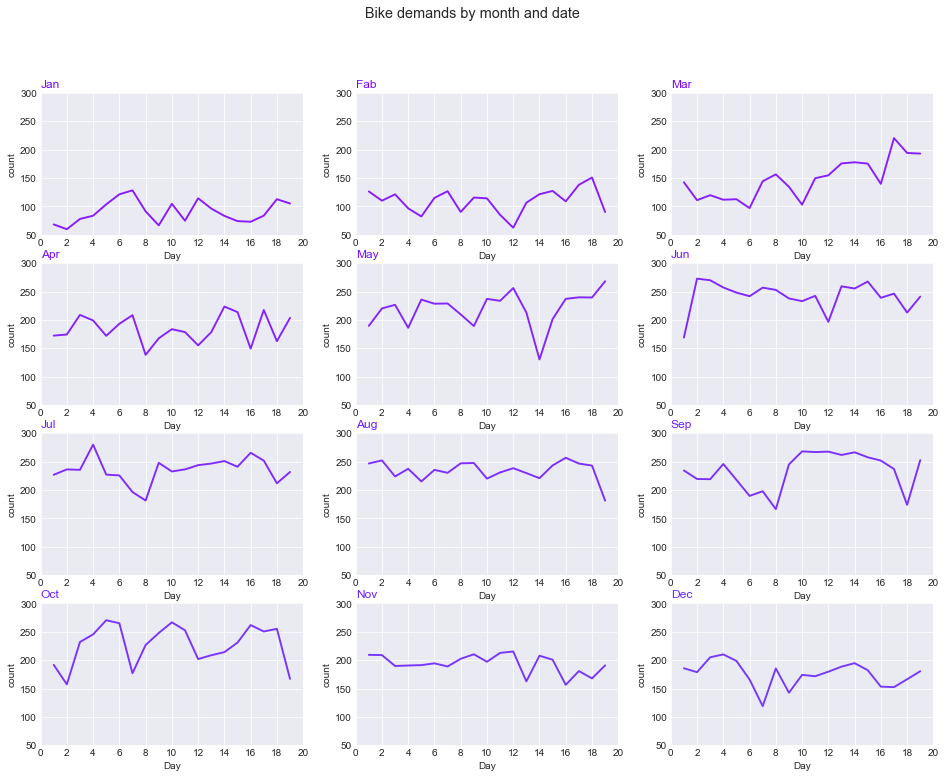

In [22]:
plt.style.use('seaborn-darkgrid')   #Initialize the figure
palette = plt.get_cmap('rainbow')      # create a color palette
fig = plt.figure(figsize=(16,12))
fig.suptitle("Bike demands by month and date", fontsize='x-large')
# multiple line plot
num=0
for column in bike_train_Month:
    num+=1 
    plt.subplot(4,3, num)
    
    plt.plot(bike_train_Month[column], marker='', color= palette(num), linewidth=1.9, alpha=0.9, label=column)
    
    plt.xlim(0, 20)
    plt.ylim(50, 300)
    plt.xticks([0,2,4,6,8,10,12,14,16,18,20])
    if num in range(10) :
        plt.tick_params(labelbottom='off')
    if num not in [1,4,7,10] :
        plt.tick_params(labelleft='off')
        
    plt.title(column, loc='left', fontsize=12, fontweight=0, color=palette(num))

    # Axis title
    plt.xlabel('Day')
    plt.ylabel('count')

IndexError: list index out of range

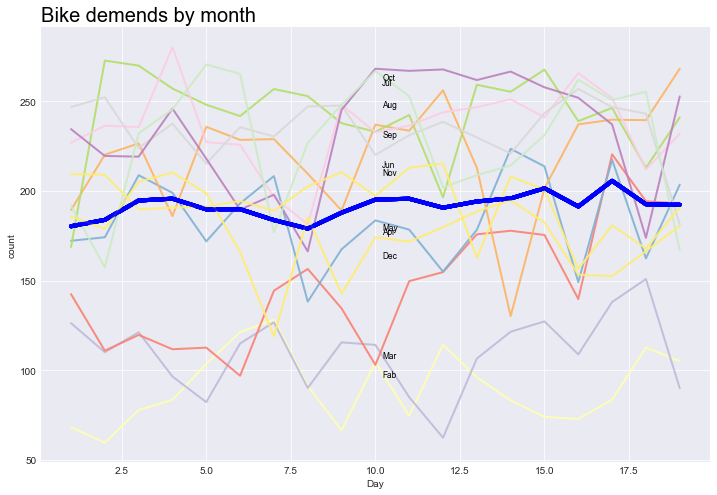

In [23]:
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set3')
fig = plt.figure(figsize=(12,8))
plt.xlabel("Day")
plt.ylabel("count")
plt.title("Bike demends by month", loc='left', fontsize=20, fontweight=0, color='black')

num=0
# multiple line plot
for column in bike_train_Month:
    num+=1
    plt.plot(bike_train_Month[column], marker='', color= palette(num), linewidth=2, alpha=0.9)
    plt.plot(bike13, marker='', color= 'blue', linewidth=4, alpha=0.9)
num=0
for i in bike_train_Month.values[12][0:]:
    num+=1
    name=list(bike_train_Month)[num]
    plt.text(10.2, i, name, horizontalalignment='left', size='small', color='black')

plt.text(10.2, bike13, 'Average demend', horizontalalignment='left', size='small', color='blue')


### 휴무일 여부와 자전거 수요의 상관관계

In [24]:
weekend = bike_train.loc[(bike_train['holiday']== 0) & (bike_train['workingday'] == 0), : ]
weekend
#공휴일은 아니지만 주말

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Time,Year,Month,Day
0,2011-01-01 0:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0,2011,1,1
1,2011-01-01 1:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,2011,1,1
2,2011-01-01 2:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2,2011,1,1
3,2011-01-01 3:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,3,2011,1,1
4,2011-01-01 4:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4,2011,1,1
5,2011-01-01 5:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,5,2011,1,1
6,2011-01-01 6:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,6,2011,1,1
7,2011-01-01 7:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,7,2011,1,1
8,2011-01-01 8:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,8,2011,1,1
9,2011-01-01 9:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14,9,2011,1,1


In [25]:
weekday = bike_train.loc[(bike_train['holiday']== 0) & (bike_train['workingday'] == 1), : ]
weekday
# 주중. 일하는 날

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Time,Year,Month,Day
47,2011-01-03 0:00,1,0,1,1,9.02,9.850,44,23.9994,0,5,5,0,2011,1,3
48,2011-01-03 1:00,1,0,1,1,8.20,8.335,44,27.9993,0,2,2,1,2011,1,3
49,2011-01-03 4:00,1,0,1,1,6.56,6.820,47,26.0027,0,1,1,4,2011,1,3
50,2011-01-03 5:00,1,0,1,1,6.56,6.820,47,19.0012,0,3,3,5,2011,1,3
51,2011-01-03 6:00,1,0,1,1,5.74,5.305,50,26.0027,0,30,30,6,2011,1,3
52,2011-01-03 7:00,1,0,1,1,5.74,6.820,50,12.9980,1,63,64,7,2011,1,3
53,2011-01-03 8:00,1,0,1,1,5.74,6.060,50,19.0012,1,153,154,8,2011,1,3
54,2011-01-03 9:00,1,0,1,1,6.56,6.820,43,26.0027,7,81,88,9,2011,1,3
55,2011-01-03 10:00,1,0,1,1,7.38,8.335,43,16.9979,11,33,44,10,2011,1,3
56,2011-01-03 11:00,1,0,1,1,8.20,9.090,40,22.0028,10,41,51,11,2011,1,3


In [26]:
holiday = bike_train.loc[(bike_train['holiday']== 1) & (bike_train['workingday'] == 0), : ]
holiday
# 주말이고 공휴일

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Time,Year,Month,Day
372,2011-01-17 0:00,1,1,0,2,8.20,9.850,47,15.0013,1,16,17,0,2011,1,17
373,2011-01-17 1:00,1,1,0,2,8.20,9.850,44,12.9980,1,15,16,1,2011,1,17
374,2011-01-17 2:00,1,1,0,2,7.38,8.335,43,16.9979,0,8,8,2,2011,1,17
375,2011-01-17 3:00,1,1,0,2,7.38,9.090,43,12.9980,0,2,2,3,2011,1,17
376,2011-01-17 4:00,1,1,0,2,7.38,9.850,43,8.9981,1,2,3,4,2011,1,17
377,2011-01-17 5:00,1,1,0,2,7.38,9.850,43,11.0014,0,1,1,5,2011,1,17
378,2011-01-17 6:00,1,1,0,2,7.38,9.090,43,12.9980,0,5,5,6,2011,1,17
379,2011-01-17 7:00,1,1,0,2,6.56,9.090,50,8.9981,4,9,13,7,2011,1,17
380,2011-01-17 8:00,1,1,0,2,6.56,7.575,47,15.0013,3,30,33,8,2011,1,17
381,2011-01-17 9:00,1,1,0,2,6.56,7.575,47,15.0013,8,39,47,9,2011,1,17


In [27]:
holidayInworkday = bike_train.loc[(bike_train['holiday']== 1) & (bike_train['workingday'] == 1), : ]
holidayInworkday    # 데이터 없음. 공휴일이면서 일하는 날 일 수 없음.. 그렇다고 한다..

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Time,Year,Month,Day


In [28]:
bikeholiday =  pd.DataFrame({'Time':bike_train['Time'],'weekend':weekend['count'], 'weekday':weekday['count'], 'holiday':holiday['count']})

Text(0, 0.5, 'count')

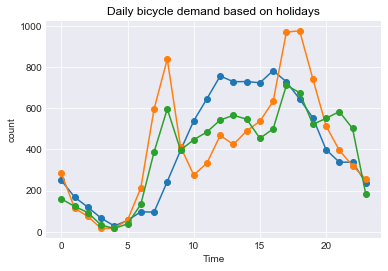

In [29]:
# blue one
plt.plot('Time', 'count', data= weekend.groupby('Time')['count'].max().reset_index(), linestyle='-', marker='o')
# yellow one
plt.plot('Time', 'count', data= weekday.groupby('Time')['count'].max().reset_index(), linestyle='-', marker='o')
# green one
plt.plot('Time', 'count', data= holiday.groupby('Time')['count'].max().reset_index(), linestyle='-', marker='o')
plt.title('Daily bicycle demand based on holidays',fontsize=12, color='black')
plt.xlabel("Time")
plt.ylabel('count')

### 날씨와 자전거 수요의 상관관계

In [30]:
#from sklearn import preprocessing
#x = bike_train['temp']
#y = bike_train['count']
#min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(x.values.reshape(-1,1))
#y_scaled = min_max_scaler.fit_transform(y.values.reshape(-1,1))

In [31]:
#plt.scatter(x_scaled, y_scaled, cmap='Blues', alpha=0.4,edgecolors='grey',linewidth=2)

### 날씨와 자전거 수요의 상관관계

Text(0, 0.5, 'count')

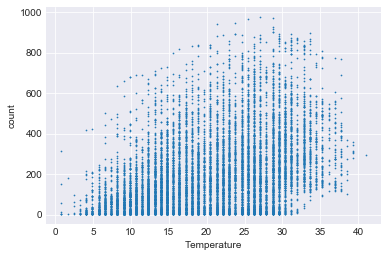

In [32]:
plt.plot('temp', 'count', data=bike_train, linestyle='', marker='o', markersize=0.7)
plt.xlabel("Temperature")
plt.ylabel("count")

In [33]:
#from sklearn import preprocessing
#p = bike_train['atemp']
#q = bike_train['count']
#min_max_scaler = preprocessing.MinMaxScaler()
#p_scaled = min_max_scaler.fit_transform(p.values.reshape(-1,1))
#q_scaled = min_max_scaler.fit_transform(q.values.reshape(-1,1))

In [34]:
#plt.scatter(p_scaled, q_scaled, cmap='Blues', alpha=0.4,edgecolors='grey',linewidth=2)

Text(0, 0.5, 'count')

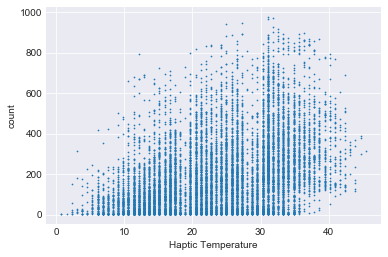

In [35]:
plt.plot('atemp', 'count', data=bike_train, linestyle='', marker='o', markersize=0.7)
plt.xlabel("Haptic Temperature")
plt.ylabel("count")

Text(0, 0.5, 'count')

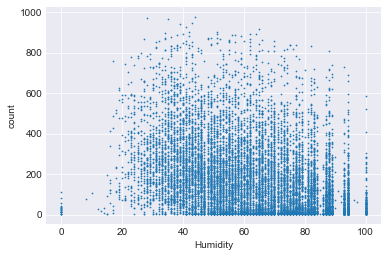

In [36]:
plt.plot('humidity', 'count', data=bike_train, linestyle='', marker='o', markersize=0.7)
plt.xlabel("Humidity")
plt.ylabel("count")

Text(0, 0.5, 'count')

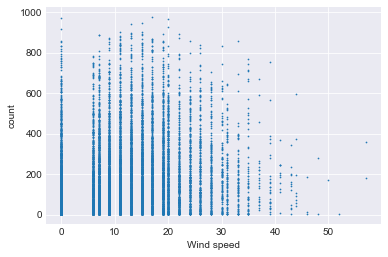

In [37]:
plt.plot('windspeed', 'count', data=bike_train, linestyle='', marker='o', markersize=0.7)
plt.xlabel("Wind speed")
plt.ylabel("count")

### 앙상블 학습을 통한 예측

In [41]:
bike_train = bike_train.drop("datetime", axis=1)

* Random Forest Cassifier

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [97]:
X = bike_train[['temp', 'holiday',  'atemp', 'humidity', 'Month', 'Day', 'weather', 'season', 'workingday', 'windspeed']]
y = bike_train['count']
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3, random_state=42  )
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [98]:
print("Accuracy : ", forest.score(X_test, y_test))

Accuracy :  0.009491733006736069


* Random Forest Regressor

In [88]:
from sklearn.ensemble import RandomForestRegressor
X = bike_train[['temp', 'holiday', 'atemp', 'humidity', 'Month', 'Day', 'weather', 'season', 'workingday', 'windspeed' ]]
y = bike_train['count']
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3, random_state=42 )
forest_reg = RandomForestRegressor(n_estimators=100)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [91]:
print("Accuracy :", forest_reg.score(X_test, y_test))

Accuracy : 0.42809307586481493


### Linear Regression

In [99]:
from sklearn.linear_model import LinearRegression
X = bike_train[['temp', 'holiday', 'atemp', 'humidity', 'Month', 'Day', 'weather', 'season', 'workingday', 'windspeed' ]]
y = bike_train['count']
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [100]:
print("Accuracy :", lin_reg.score(X_test, y_test))

Accuracy : 0.2663059736253631


### PCA

In [101]:
from sklearn.preprocessing import StandardScaler
X = bike_train[['temp', 'holiday', 'atemp', 'humidity', 'Month', 'Day', 'weather', 'season', 'workingday', 'windspeed' ]]
y = bike_train['count']


scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [103]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)
print("원본 데이터 형태: {}".format(str(X_scaled.shape)))
print("축소된 데이터 형태: {}".format(str(X_pca.shape)))

원본 데이터 형태: (10886, 10)
축소된 데이터 형태: (10886, 2)


In [117]:
y.mean()

191.57413191254824

Text(0, 0.5, '2nd principal component')

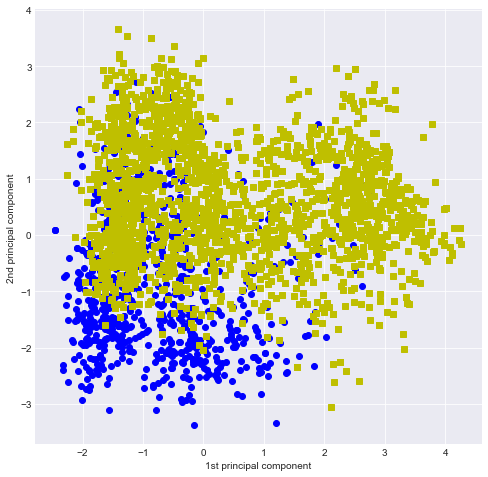

In [131]:
plt.figure(figsize=(8,8))
plt.plot(X_pca[y>500,0], X_pca[y>500,1], 'bo')
plt.plot(X_pca[y<30,0], X_pca[y<30,1], 'ys')
plt.xlabel('1st principal component')
plt.ylabel('2nd principal component')

In [132]:
pca.explained_variance_ratio_

array([0.25475225, 0.17381892])